In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )

In [2]:
### gather result
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import numpy as np

api = wandb.Api()

def normalize_name(x):
    if x in cpa_runs:
        return 'CPA'
    elif x in pertnet_runs:
        return 'GEARS'
    elif x in linear_runs:
        return 'Linear'
    else:
        return 'No-Perturb'

df_all_datasets = {}
for data_name in ['norman2019', 'adamson2016', 'dixit2016']:

    # Project is specified by <entity/project-name> please replace it with your project name here:
    runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)

    summary_list, config_list, name_list = [], [], []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
              if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

    runs_df = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        "name": name_list
        })


    run = 6
    cpa_runs = ['CPA_' + str(i) for i in range(1, run)]
    pertnet_runs = ['PertNet_API_Seed' + str(i) for i in range(1, run)]
    no_perturb_runs = ['No_Perturb_' + str(i) for i in range(1, run)]
    linear_runs = ['Linear_' + str(i) for i in range(1, run)]

    res_df = runs_df[runs_df.name.isin(cpa_runs + pertnet_runs + no_perturb_runs + linear_runs)]

    metrics = [
               'test_frac_sigma_below_1_non_dropout', 
               'test_frac_opposite_direction_top20_non_dropout',
               'test_mse_top20_de_non_dropout', 
               'test_pearson_delta'
              ]
    metrics_name_map = {
                        'test_frac_opposite_direction_top20_non_dropout': '% of Top 20 DE Genes with Opposite Direction',
                       'test_frac_sigma_below_1_non_dropout': '% of STD <1',
                       'test_mse_top20_de_non_dropout': 'Top 20 DE MSE',
                       'test_pearson_delta': 'Pearson Correlation Across All Genes'}
    out = {}
    out['method'] = [normalize_name(i) for i in res_df.name.values]
    for m in metrics:
        out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
    out = pd.DataFrame(out)
    out['dataset'] = data_name[:-4].capitalize()
    df_all_datasets[data_name] = out
df = pd.concat((df_all_datasets['norman2019'], df_all_datasets['adamson2016'], df_all_datasets['dixit2016']))

In [5]:
df

,method,% of STD <1,% of Top 20 DE Genes with Opposite Direction,Top 20 DE MSE,Pearson Correlation Across All Genes,dataset
0,GEARS,0.872222,0.148990,0.175361,0.568595,Norman
1,GEARS,0.789516,0.172984,0.307174,0.514812,Norman
2,GEARS,0.858482,0.132143,0.203199,0.594520,Norman
3,GEARS,0.882110,0.139908,0.181694,0.562796,Norman
4,GEARS,0.848276,0.147845,0.213608,0.541332,Norman
5,Linear,0.595565,0.481452,0.555975,0.120847,Norman
6,Linear,0.652294,0.483028,0.489518,0.127557,Norman
7,Linear,0.646465,0.488889,0.512224,0.125205,Norman
8,Linear,0.622768,0.504018,0.561234,0.120055,Norman
9,Linear,0.612069,0.483621,0.510630,0.117754,Norman


In [6]:
color_pal = {
'Linear': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
'CPA': (0.4, 0.7607843137254902, 0.6470588235294118),
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}
order = ['No-Perturb', 'Linear', 'CPA', 'GEARS']
pal = [color_pal[i] for i in order]

In [7]:
df = df.rename(columns = {"Top 20 DE MSE": "MSE of Top 20 DE Genes"})

In [12]:
import numpy as np
d = pd.DataFrame(df.groupby(['method', 'dataset'])['MSE of Top 20 DE Genes'].agg(np.mean))
d = d.reset_index()
for i in d.dataset.unique():
    x = d[d.dataset == i]['MSE of Top 20 DE Genes'].values
    print(i + ': ' + str(np.abs(x[0] - x[3])/x[0]))

Adamson: 0.5252025190544941
Dixit: 0.6427493387573701
Norman: 0.3994697055600225


In [13]:
import numpy as np
d = pd.DataFrame(df.groupby(['method', 'dataset'])['Pearson Correlation Across All Genes'].agg(np.mean))
d = d.reset_index()
for i in d.dataset.unique():
    x = d[d.dataset == i]['Pearson Correlation Across All Genes'].values
    print(i + ': ' + str(np.abs(x[0] - x[3])/x[0]))

Adamson: 3.4912314815236827
Dixit: -127.65238626935958
Norman: 0.2735820588220633


In [14]:
import numpy as np
d = pd.DataFrame(df.groupby(['method', 'dataset'])['% of STD <1'].agg(np.mean))
d = d.reset_index()
for i in d.dataset.unique():
    x = d[d.dataset == i]['% of STD <1'].values
    print(i + ': ' + str(np.abs(x[0] - x[3])/x[0]))

Adamson: 3.1497797356828197
Dixit: 0.7176470588235294
Norman: 0.08267158383403247


/dfs/user/kexinh/miniconda3/envs/bbkg_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


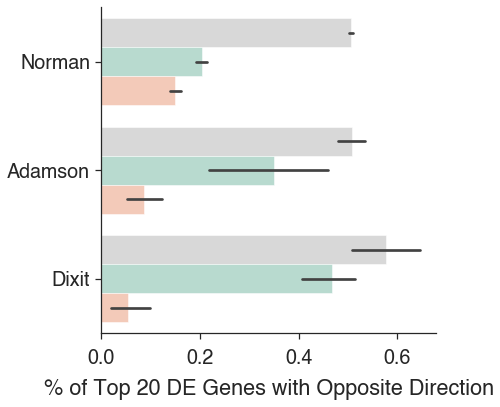

In [15]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.barplot('% of Top 20 DE Genes with Opposite Direction', 'dataset', hue = 'method',
    data=df,  hue_order = [ 'No-Perturb', 'CPA', 'GEARS'],
    palette=[pal[0],'#66c2a5', '#fc8d62'], saturation=0.75, orient = 'h', alpha = 0.5)
sns.despine()
g.legend_.remove()
g.set(ylabel=None)

plt.xlabel("% of Top 20 DE Genes with Opposite Direction",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)

plt.savefig('direction_top20_bar.pdf', bbox_inches='tight')

/dfs/user/kexinh/miniconda3/envs/bbkg_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


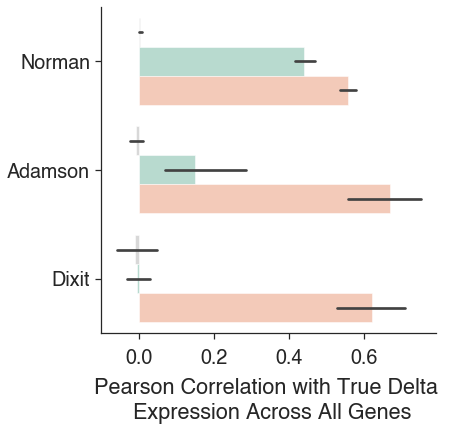

In [17]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.barplot('Pearson Correlation Across All Genes', 'dataset', hue = 'method',
    data=df,  hue_order = [ 'No-Perturb', 'CPA', 'GEARS'],
    palette=[pal[0],'#66c2a5', '#fc8d62'], saturation=0.75, orient = 'h', alpha = 0.5)
sns.despine()
g.legend_.remove()
g.set(ylabel=None)

plt.xlabel("Pearson Correlation with True Delta \n Expression Across All Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)

plt.savefig('pearson_bar.pdf', bbox_inches='tight')

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


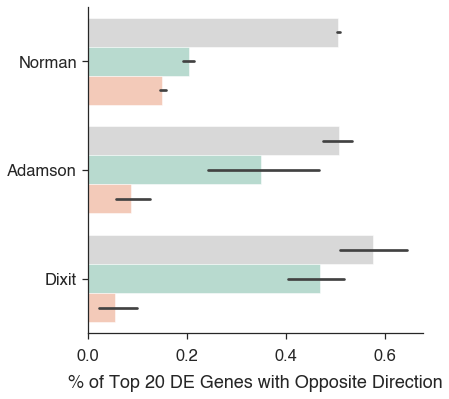

In [18]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.5)

g = sns.barplot('% of Top 20 DE Genes with Opposite Direction', 'dataset', hue = 'method',
    data=df,  hue_order = [ 'No-Perturb', 'CPA', 'PertNet'],
    palette=[pal[0],'#66c2a5', '#fc8d62'], saturation=0.75, orient = 'h', alpha = 0.5)
sns.despine()
g.legend_.remove()
g.set(ylabel=None)

plt.xlabel("% of Top 20 DE Genes with Opposite Direction",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)

plt.savefig('direction_top20_bar.pdf', bbox_inches='tight')

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


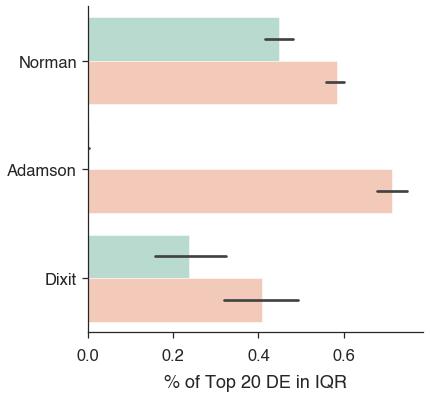

In [19]:
g = sns.barplot('% in IQR', 'dataset', hue = 'method',
    data=df,  hue_order = [ 'CPA', 'PertNet'],
    palette=['#66c2a5', '#fc8d62'], saturation=0.75, orient = 'h', alpha = 0.5)
sns.despine()
g.legend_.remove()
g.set(ylabel=None)

plt.xlabel("% of Top 20 DE in IQR",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)

plt.savefig('iqr_bar.pdf', bbox_inches='tight')

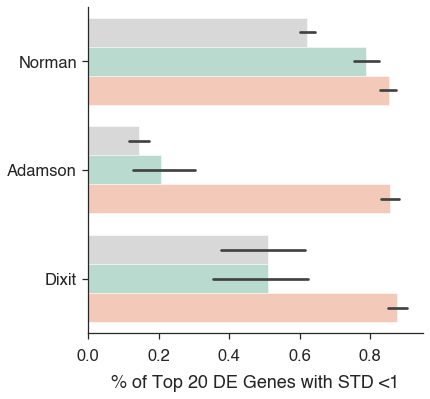

In [20]:
g = sns.barplot('% of STD <1', 'dataset', hue = 'method',
     data=df,  hue_order = [ 'No-Perturb', 'CPA', 'PertNet'],
    palette=[pal[0],'#66c2a5', '#fc8d62'], saturation=0.75, orient = 'h', alpha = 0.5)
sns.despine()
g.legend_.remove()
g.set(ylabel=None)

plt.xlabel("% of Top 20 DE Genes with STD <1",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)

plt.savefig('std_bar.pdf', bbox_inches='tight')